# GUESS MY WEIGHT 

![guess_your_weight.gif](images/guess_your_weight.gif)

## Table of Contents TOC
[Overview](#overview)<br />
[Data Understanding](#data-understanding)<br />
[Data Preparation](#data-preparation)<br />
[Modeling](#modeling)<br />
[Evaluation](#evaluation)<br />
[Github Repository and Resources](#github-repository-and-resources)<br />


## Overview
Health and Wellness is a big business. Specifically, weight loss. We’re all trying because it’s very, very hard. I recently went on my own weight loss journey, losing about 50 lbs in roughly 18 months. Weighing myself every morning, I agonized over every tenth of a lb, recording it in an app on my phone. I realized that losing big chunks of weights starts with small, incremental progress on the scale. But I didn’t stop there. As a data nerd I thought, “let’s record every meal.” So I did that too. I wondered… given all this data I have, could I predict my weight? My watch and phone captures my exercise, sleep, eating, and so much more. There must be trends here. At a minimum, I should be able to predict whether my weight will go up or down from the previous day. So let’s do it.<br />
[return to TOC](#table-of-contents-TOC)

## Data Understanding
I have much (and probably too much) of this data in my iphone and Apple Watch. It contains the weight information, workouts, heart rate, meals - broken down into subcategories (proteins, fats, etc). Most importantly is the weight. That will be the feature that I primarily use for classification.  

Because it’s my data, there’s more clarity about data entry methods. This is more subjective, than a controlled experiment with many participants. I know what data I was diligent about collecting so I should be able to scrub it appropriately. For instance, I didn’t record my fluids consistently - water, tea, coffee. Water consumption is a big part of this so I’ll have to be clear about the gaps in the data.<br />
[return to TOC](#table-of-contents-TOC)


## Data Preparation
The data is stored on a csv file in a kaggle repository.

in an xml file on my phone. After downloading it into python notebook and digging a little, there are roughly 180 rows of weight entries (approximately 6 months) but it’s not clear how many gaps there are. All of the data is stored as an entry, with time stamps and usually some numeric form. Whether it’s heart rate, weight, caloric info, it’s one numeric entry with an associated units. We’re primarily dealing with ints and floats, all numeric, and we’ll be using daily totals/averages. Because we only have one weigh-in per day, we’re only going to use daily values of other data. So… we know we have approximately 100-180 rows. I can’t say at the moment how many columns, because this will be based on what happens in pre-processing. Which brings me to../.

There are two major challenges with the pre-processing. The first deals with the privacy of my personal health data. How do I balance reproducibility requirements with privacy concerns? I need to make the dataset publicly available, including all of my pre-processing steps, but I also want to make sure no one can link it back to me, Andrew Q. Bennett (my real middle name doesn’t start with Q… gotcha!!!!). And the initial dataset is large, maybe 40 MB. The approach we’ll use is to perform some pre-processing locally, and then upload to the kaggle site when it’s ready for public consumption. In my jupyter notebook, I will comment out some of this code so that we can see the work, but it won’t affect the code when we press “run”.

The second is dealing with correlation efforts. For instance, we know that all data related to working out is going to be correlated with eachother. The steps, average heart rate, workout calories, etc will all be correlated to whether I went for a jog that day. Making decisions about which data to use will be a challenge, even with some baseline domain knowledge. There is a treasure trove that may have nothing (or very little) to do with weight loss, like Vitamin A intake. PCA Analysis will be critical without losing some data. I know about health…but I’m no expert. Maybe Vitamin A intake can help/hurt weight loss.

The many visualization efforts will come from making sure the weight data is presented cleanly. A nice, regression line showing weight trends over different periods will be very helpful.<br />
[return to TOC](#table-of-contents-TOC)

In [171]:
import pandas as pd

In [172]:
df = pd.read_csv('pre_kaggle/weight_data.csv')
df

,Unnamed: 0,type,unit,creationDate,startDate,endDate,value
0,793917,HKCategoryTypeIdentifierSleepAnalysis,HKCategoryValueSleepAnalysisInBed,2023-07-24 05:30:00,2023-07-23 21:52:17,2023-07-23 21:53:47,1.0000
1,793918,HKCategoryTypeIdentifierSleepAnalysis,HKCategoryValueSleepAnalysisInBed,2023-07-24 05:30:00,2023-07-23 22:13:46,2023-07-23 22:13:59,1.0000
2,793919,HKCategoryTypeIdentifierSleepAnalysis,HKCategoryValueSleepAnalysisInBed,2023-07-24 05:30:00,2023-07-23 22:14:56,2023-07-23 22:58:00,1.0000
3,793920,HKCategoryTypeIdentifierSleepAnalysis,HKCategoryValueSleepAnalysisAsleepCore,2023-07-24 07:05:22,2023-07-23 23:12:48,2023-07-23 23:40:48,1.0000
4,793921,HKCategoryTypeIdentifierSleepAnalysis,HKCategoryValueSleepAnalysisAsleepDeep,2023-07-24 07:05:22,2023-07-23 23:40:48,2023-07-24 00:06:18,1.0000
...,...,...,...,...,...,...,...
856980,856980,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2024-03-06 01:01:10,2024-03-06 01:00:08,2024-03-06 01:01:07,44.3289
856981,856981,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2024-03-06 03:01:11,2024-03-06 03:00:09,2024-03-06 03:01:08,54.3759
856982,856982,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2024-03-06 05:01:11,2024-03-06 05:00:09,2024-03-06 05:01:08,76.2300
856983,856983,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,ms,2024-03-06 07:01:22,2024-03-06 07:00:20,2024-03-06 07:01:20,45.6944


### EDA - Prescrubbing
Some EDA was previously performed to get the dataset into Kaggle. Now, of course, we have to get our data oriented for our analysis. We know we want our daily weigh-in data to be our target feature. We also know we want one daily value for each variable feature. For instance, there's multiple data on sleep, but perhaps we only care about the total hours that we're slept. First, let's strip the data type descriptions to something readable.

I want to create a table with weight as the target with only one value for each day.

1. Separate sleep and non-sleep - create a check to separate daily values with non-daily values.
    Sample, create table with daily values.
2. Create a 
 

In [173]:
df.sort_values('startDate')

,Unnamed: 0,type,unit,creationDate,startDate,endDate,value
267737,254050,HKQuantityTypeIdentifierBasalEnergyBurned,Cal,2023-07-23 08:05:38,2023-07-23 00:43:05,2023-07-23 01:43:05,76.125
267738,254051,HKQuantityTypeIdentifierBasalEnergyBurned,Cal,2023-07-23 08:05:38,2023-07-23 01:43:05,2023-07-23 02:43:05,76.125
267739,254052,HKQuantityTypeIdentifierBasalEnergyBurned,Cal,2023-07-23 08:05:38,2023-07-23 02:43:05,2023-07-23 03:43:05,76.125
267740,254053,HKQuantityTypeIdentifierBasalEnergyBurned,Cal,2023-07-23 08:05:38,2023-07-23 03:43:05,2023-07-23 04:43:05,76.125
267741,254054,HKQuantityTypeIdentifierBasalEnergyBurned,Cal,2023-07-23 08:05:38,2023-07-23 04:43:05,2023-07-23 05:43:05,76.125
...,...,...,...,...,...,...,...
807601,793914,HKQuantityTypeIdentifierPhysicalEffort,kcal/hr·kg,2024-03-06 09:52:33,2024-03-06 09:50:45,2024-03-06 09:50:53,4.800
807602,793915,HKQuantityTypeIdentifierPhysicalEffort,kcal/hr·kg,2024-03-06 09:55:25,2024-03-06 09:50:53,2024-03-06 09:55:01,1.500
128988,115301,HKQuantityTypeIdentifierHeartRate,count/min,2024-03-06 09:58:47,2024-03-06 09:52:51,2024-03-06 09:52:51,52.000
807603,793916,HKQuantityTypeIdentifierPhysicalEffort,kcal/hr·kg,2024-03-06 09:56:26,2024-03-06 09:55:01,2024-03-06 09:55:12,4.800


In [113]:
import datetime as dt

#convert the time/date columns to datetime without time zone
df['creationDate'] = pd.to_datetime(df['creationDate']).dt.tz_localize(None)
df['startDate'] = pd.to_datetime(df['startDate']).dt.tz_localize(None)
df['endDate'] = pd.to_datetime(df['endDate']).dt.tz_localize(None)

EDA Scrubbing - Let's clean the names. To do this, we will split the df into three frames and then reconnect

In [114]:
#create two df, category and non-category
category_df = df[df['type'].str.contains("Category")]
quantity_df = df[df['type'].str.contains("Quantity")]

In [115]:
#scrub type columns
category_df.loc[:,'type'] = category_df['type'].str.replace('HKCategoryTypeIdentifier', "")
quantity_df.loc[:,'type'] = quantity_df['type'].str.replace('HKQuantityTypeIdentifier', "")

In [116]:
#create two df, category and non-category
sleep_df = category_df[category_df['type'].str.contains("Sleep")]
non_sleep_df = category_df[~category_df['type'].str.contains("Sleep")]

In [117]:
#scrub unit column (non_sleep)
non_sleep_df.loc[non_sleep_df['unit'].str.contains("HKCategoryValueAppleStand"),'unit'] = non_sleep_df['unit'].str.replace('HKCategoryValueAppleStand', "")
non_sleep_df.loc[non_sleep_df['unit'].str.contains("HKCategoryValueEnvironmentalAudioExposureEvent"),'unit'] = non_sleep_df['unit'].str.replace("HKCategoryValueEnvironmentalAudioExposureEvent", "")

In [118]:
#scrub unit column (sleep)
sleep_df.loc[sleep_df['unit'].str.contains("HKCategoryValueSleepAnalysis"),'unit'] = sleep_df['unit'].str.replace("HKCategoryValueSleepAnalysis", "")


In [119]:
#scrub sleep column
sleep_df.loc[:,'type'] = sleep_df['type'] + '_' + sleep_df['unit']
sleep_df = sleep_df.drop('unit', axis = 1)

In [120]:
#scrub quantity df 
quantity_df.loc[:,'type'] = quantity_df['type'] + '_' + quantity_df['unit']
quantity_df = quantity_df.drop('unit', axis = 1)

quantity_df

,Unnamed: 0,type,creationDate,startDate,endDate,value
13687,0,DietaryWater_mL,2023-07-24 10:41:41,2023-07-23 10:41:00,2023-07-23 10:41:00,473.1760
13688,1,DietaryWater_mL,2023-08-23 09:54:44,2023-08-23 09:54:00,2023-08-23 09:54:00,236.5880
13689,2,DietaryWater_mL,2023-08-25 07:02:45,2023-08-25 07:02:00,2023-08-25 07:02:00,473.1760
13690,3,DietaryWater_mL,2023-08-25 07:02:55,2023-08-26 07:02:00,2023-08-26 07:02:00,473.1760
13691,4,DietaryWater_mL,2023-09-05 08:30:09,2023-09-05 08:30:00,2023-09-05 08:30:00,473.1760
...,...,...,...,...,...,...
856980,856980,HeartRateVariabilitySDNN_ms,2024-03-06 01:01:10,2024-03-06 01:00:08,2024-03-06 01:01:07,44.3289
856981,856981,HeartRateVariabilitySDNN_ms,2024-03-06 03:01:11,2024-03-06 03:00:09,2024-03-06 03:01:08,54.3759
856982,856982,HeartRateVariabilitySDNN_ms,2024-03-06 05:01:11,2024-03-06 05:00:09,2024-03-06 05:01:08,76.2300
856983,856983,HeartRateVariabilitySDNN_ms,2024-03-06 07:01:22,2024-03-06 07:00:20,2024-03-06 07:01:20,45.6944


In [121]:
#scrub non-sleep df
non_sleep_df.loc[:,'type'] = non_sleep_df['type'] + '_' + non_sleep_df['unit']
non_sleep_df = non_sleep_df.drop('unit', axis = 1)

non_sleep_df

,Unnamed: 0,type,creationDate,startDate,endDate,value
8144,802061,AppleStandHour_HourStood,2023-07-23 08:10:10,2023-07-23 08:00:00,2023-07-23 09:00:00,1.0
8145,802062,AppleStandHour_HourStood,2023-07-23 09:02:15,2023-07-23 09:00:00,2023-07-23 10:00:00,1.0
8146,802063,AppleStandHour_HourStood,2023-07-23 10:09:32,2023-07-23 10:00:00,2023-07-23 11:00:00,1.0
8147,802064,AppleStandHour_HourStood,2023-07-23 11:16:34,2023-07-23 11:00:00,2023-07-23 12:00:00,1.0
8148,802065,AppleStandHour_HourStood,2023-07-23 12:04:09,2023-07-23 12:00:00,2023-07-23 13:00:00,1.0
...,...,...,...,...,...,...
13682,807599,AudioExposureEvent_MomentaryLimit,2024-01-21 11:51:53,2024-01-21 11:49:03,2024-01-21 11:51:53,1.0
13683,807600,AudioExposureEvent_MomentaryLimit,2024-02-09 10:46:59,2024-02-09 10:44:04,2024-02-09 10:46:59,1.0
13684,807601,AudioExposureEvent_MomentaryLimit,2024-02-12 15:42:33,2024-02-12 15:39:43,2024-02-12 15:42:33,1.0
13685,807602,AudioExposureEvent_MomentaryLimit,2024-02-13 08:30:05,2024-02-13 08:27:10,2024-02-13 08:30:05,1.0


In [158]:
#create a new dataframe of just the weight and one data from the existing quantity_df
weight_df = quantity_df.loc[quantity_df['type'].str.contains('BodyMass_lb')]

#drop extra columns, resett index and rename columns
weight_df = weight_df.drop(['Unnamed: 0', 'type', 'creationDate', 'endDate'], axis = 1)
weight_df = weight_df.sort_values('startDate')
weight_df = weight_df.reset_index(drop=True)
weight_df.rename(columns={'startDate': 'date', 'value': 'weight_lbs'}, inplace=True)
weight_df

,date,weight_lbs
0,2023-08-24 23:00:00,196.9
1,2023-08-25 23:00:00,195.1
2,2023-08-26 23:00:00,195.1
3,2023-08-27 23:00:00,192.9
4,2023-08-28 07:39:18,192.9
...,...,...
130,2024-03-02 07:37:02,174.6
131,2024-03-03 13:03:54,175.0
132,2024-03-04 07:43:58,175.7
133,2024-03-05 08:17:17,174.2


In [169]:
#weight_df.iloc[134,0] - weight_df.iloc[0,0]
#weight_df['start']
#weight_df['date'] = pd.to_datetime(weight_df['date']).replace(hour=7)
weight_df['date']
#weight_df['date'].replace(hour=7)



#In [2]: ts = pd.Timestamp('2014/11/12 13:35')
#In [3]: ts.replace(hour=0)
#Out[3]: Timestamp('2014-11-12 00:35:00')
#In [4]: ts
#Out[4]: Timestamp('2014-11-12 13:35:00')

0     2023-08-24 23:00:00
1     2023-08-25 23:00:00
2     2023-08-26 23:00:00
3     2023-08-27 23:00:00
4     2023-08-28 07:39:18
              ...        
130   2024-03-02 07:37:02
131   2024-03-03 13:03:54
132   2024-03-04 07:43:58
133   2024-03-05 08:17:17
134   2024-03-06 07:10:33
Name: date, Length: 135, dtype: datetime64[ns]

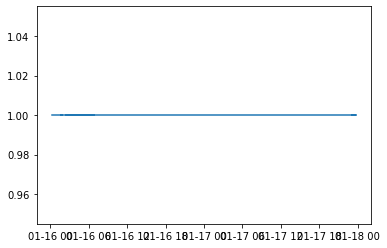

In [10]:
import datetime
import numpy as np
import matplotlib.pyplot as plt

#def daily_acc(heatlh_type, sleep_df)

lower_date = datetime.datetime(2024, 1, 16, 12, 0, 0, 0, tzinfo = None)
upper_date = datetime.datetime(2024, 1, 17, 11, 59, 59, 99, tzinfo = None)

sleep_trial_df = sleep_df[(sleep_df['startDate'] < upper_date) & (sleep_df['startDate'] > lower_date)]
sleep_trial['unit']

3sleep = np.array(sleep_trial_df['value'])
#dates = np.array(sleep_trial_df['startDate'])

#plt.plot(dates, sleep)
